# Assignment 9-16: Implementing a Neural Network from scratch using Python and NumPy

2021060904008 - 周杰锋

## 9 设计MLP解决 多分类问题 (from scratch)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data

NUM_1 = np.array([[0,1,1,0,0],[0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0],[0,1,1,1,0]])
NUM_2 = np.array([[1,1,1,1,0], [0,0,0,0,1],[0,1,1,1,0],[1,0,0,0,0],[1,1,1,1,1]])
NUM_3 = np.array([[1,1,1,1,0],[0,0,0,0,1],[0,1,1,1,0],[0,0,0,0,1],[1,1,1,1,0]])
NUM_4 = np.array([[0,0,0,1,0],[0,0,1,1,0],[0,1,0,1,0],[1,1,1,1,1],[0,0,0,1,0]])
NUM_5 = np.array([[1,1,1,1,1],[1,0,0,0,0],[1,1,1,1,0],[0,0,0,0,1],[1,1,1,1,0]])

X_train = np.array([NUM_1, NUM_2, NUM_3, NUM_4, NUM_5]).reshape(5,-1)

Y_train = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])

class MLP:
    def __init__(self, in_hidden_out:list, if_bias=False, seed=None):
        self.input_size = in_hidden_out[0]
        self.output_size = in_hidden_out[-1]
        self.hidden_layers = len(in_hidden_out) - 2
        self.in_hidden_out = in_hidden_out
        self.if_bias = if_bias
        self.seed = seed
        self.weights = []
        self.biases = []
        self.loss = []
        self.activations = []
        self.num_classes = in_hidden_out[-1]


        self.initialize_weights_and_biases()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    
    def corss_entropy(self, y_pred, y_true):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    

    def MSD(self, y_pred, y_true):
        return np.mean((y_pred - y_true)**2)

    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)


    def initialize_weights_and_biases(self):
        if self.seed:
            np.random.seed(self.seed)
        for i in range(self.hidden_layers + 1):
            self.weights.append(np.random.rand(self.in_hidden_out[i], self.in_hidden_out[i+1]) * 2 -1)
            if self.if_bias:
                self.biases.append(np.random.rand((1, self.in_hidden_out[i+1]))*2 -1)
            else:
                self.biases.append(np.zeros((1, self.in_hidden_out[i+1])))

    def forward(self, X):
        self.activations = [X]
        for i in range(self.hidden_layers + 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            a = self.sigmoid(z)
            self.activations.append(a)
        # softmax output layer
        self.activations[-1] = self.softmax(self.activations[-1])
        return self.activations[-1]

    def backward(self, X, y, learning_rate):
        _ = self.forward(X)
        error = y - self.activations[-1]

        self.loss.append(self.corss_entropy(self.activations[-1], y))

        delta = error
        self.weights[-1] += learning_rate * np.dot(self.activations[-2].T, delta)
        if self.if_bias:
            self.biases[-1] += learning_rate * np.sum(delta, axis=0, keepdims=True)

        for i in range(self.hidden_layers, 0, -1):
            delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(self.activations[i])
            self.weights[i-1] += learning_rate * np.dot(self.activations[i-1].T, delta)
            if self.if_bias:
                self.biases[i-1] += learning_rate * np.sum(delta, axis=0, keepdims=True)

    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            self.backward(X, y, learning_rate)


    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

In [2]:
print(X_train)

[[0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0]
 [1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0]]


===== 	 MLPClassifier Before Training 	 =====
[[0.13576873 0.15054844 0.30537435 0.13913304 0.26917545]
 [0.24646851 0.13339557 0.24173507 0.13147015 0.2469307 ]
 [0.25361505 0.1355886  0.22477188 0.12258736 0.2634371 ]
 [0.15586516 0.13997985 0.2789299  0.12738248 0.2978426 ]
 [0.22685594 0.14534138 0.25131373 0.12073819 0.25575077]]
===== 	 MLPClassifier After Training 	 =====
[[0.40460968 0.14884758 0.14884758 0.14884758 0.14884758]
 [0.14596971 0.3967701  0.16533306 0.14596356 0.14596356]
 [0.12435813 0.15426087 0.33804044 0.12435813 0.25898243]
 [0.14884758 0.14884758 0.14884758 0.40460968 0.14884758]
 [0.13878774 0.13878774 0.20637258 0.13878774 0.37726419]]
===== 	 Groud Truth 	 =====
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


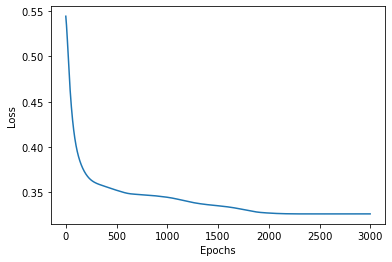

In [5]:
MLPClassifier = MLP([5*5, 50, 5], seed=42)
print("===== \t MLPClassifier Before Training \t =====")
print(MLPClassifier.forward(X_train))
MLPClassifier.train(X_train, Y_train, epochs=3000, learning_rate=0.01)
print("===== \t MLPClassifier After Training \t =====")
print(MLPClassifier.forward(X_train))
print("===== \t Groud Truth \t =====")
print(Y_train)
MLPClassifier.plot_loss()

## 10 用训练数据训练网络，用测试数据测试训练结果
（注：运行多次观察结果是否变化思考原因）

不变化（因为里面的权值已经固定了，所以每次运行的结果都是一样的）

In [48]:
TEST_NUM_1 = np.array([[0,0,1,1,0],[0,0,1,1,0],[0,1,0,1,0],[0,0,0,1,0],[0,1,1,1,0]])
TEST_NUM_2 = np.array([[1,1,1,1,0],[0,0,0,0,1],[0,1,1,1,0],[1,0,0,0,1],[1,1,1,1,1]])
TEST_NUM_3 = np.array([[1,1,1,1,0],[0,0,0,0,1],[0,1,1,1,0],[1,0,0,0,1],[1,1,1,1,0]])
TEST_NUM_4 = np.array([[0,1,1,1,0],[0,1,0,0,0],[0,1,1,1,0],[0,0,0,1,0],[0,1,1,1,0]])
TEST_NUM_5 = np.array([[0,1,1,1,1],[0,1,0,0,0],[0,1,1,1,0],[0,0,0,1,0],[1,1,1,1,0]])

TEST_X = np.array([TEST_NUM_1, TEST_NUM_2, TEST_NUM_3, TEST_NUM_4, TEST_NUM_5]).reshape(5,-1)

TEST_Y = np.array([[1,0,0,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,0,0,1],[0,0,0,0,1]])

print(MLPClassifier.forward(TEST_X))
print("===== \t Groud Truth \t =====")
print(TEST_Y)

[[0.32220249 0.11853167 0.11853167 0.32220249 0.11853167]
 [0.11853167 0.32220249 0.32220249 0.11853167 0.11853167]
 [0.11853166 0.32220247 0.32220247 0.11853166 0.11853174]
 [0.32228694 0.1194896  0.32109667 0.11856274 0.11856406]
 [0.26793449 0.09859097 0.26688554 0.09859096 0.26799803]]
===== 	 Groud Truth 	 =====
[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]


## 11 构建其它测试数据构建

In [49]:
N_TEST_NUM_1 = np.array([[0,0,0,1,0],[0,0,1,1,0],[0,1,0,1,0],[0,0,0,1,0],[0,0,0,1,0]])
N_TEST_NUM_2 = np.array([[0,1,1,1,0],[0,0,0,0,1],[0,1,1,1,0],[1,0,0,0,0],[1,1,1,0,0]])
N_TEST_NUM_3 = np.array([[0,1,1,1,0],[0,0,0,0,1],[0,1,1,1,0],[0,0,0,0,1],[0,1,1,1,0]])
N_TEST_NUM_4 = np.array([[0,0,0,1,0],[0,0,1,1,0],[0,1,0,1,0],[0,1,1,1,0],[0,0,0,1,0]])
N_TEST_NUM_5 = np.array([[0,1,1,1,0],[0,1,0,0,0],[0,1,1,1,0],[0,0,0,1,0],[0,1,1,1,0]])

N_TEST_X = np.array([TEST_NUM_1, TEST_NUM_2, TEST_NUM_3, TEST_NUM_4, TEST_NUM_5]).reshape(5,-1)

N_TEST_Y = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])

print(MLPClassifier.forward(N_TEST_X))
print("===== \t Groud Truth \t =====")
print(N_TEST_Y)

[[0.32220249 0.11853167 0.11853167 0.32220249 0.11853167]
 [0.11853167 0.32220249 0.32220249 0.11853167 0.11853167]
 [0.11853166 0.32220247 0.32220247 0.11853166 0.11853174]
 [0.32228694 0.1194896  0.32109667 0.11856274 0.11856406]
 [0.26793449 0.09859097 0.26688554 0.09859096 0.26799803]]
===== 	 Groud Truth 	 =====
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


## 12  练习12：补全上述代码，观察训练结果是否有效。


In [3]:
class MLP_with_RELU:
    def __init__(self, in_hidden_out:list, if_bias=False, seed=None):
        self.input_size = in_hidden_out[0]
        self.output_size = in_hidden_out[-1]
        self.hidden_layers = len(in_hidden_out) - 2
        self.in_hidden_out = in_hidden_out
        self.if_bias = if_bias
        self.seed = seed
        self.weights = []
        self.biases = []
        self.loss = []
        self.activations = []
        self.num_classes = in_hidden_out[-1]


        self.initialize_weights_and_biases()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    
    def corss_entropy(self, y_pred, y_true):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    

    def MSD(self, y_pred, y_true):
        return np.mean((y_pred - y_true)**2)
    

    def ReLU(self, x):
        return np.maximum(0, x)

    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)


    def initialize_weights_and_biases(self):
        if self.seed:
            np.random.seed(self.seed)
        for i in range(self.hidden_layers + 1):
            self.weights.append(np.random.rand(self.in_hidden_out[i], self.in_hidden_out[i+1]) * 2 -1)
            if self.if_bias:
                self.biases.append(np.random.rand((1, self.in_hidden_out[i+1]))*2 -1)
            else:
                self.biases.append(np.zeros((1, self.in_hidden_out[i+1])))

    def forward(self, X):
        self.activations = [X]
        for i in range(self.hidden_layers + 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            # a = self.sigmoid(z)
            a = self.ReLU(z)
            self.activations.append(a)
        # softmax output layer
        self.activations[-1] = self.softmax(self.activations[-1])
        return self.activations[-1]

    def backward(self, X, y, learning_rate):
        _ = self.forward(X)
        error = y - self.activations[-1]

        self.loss.append(self.corss_entropy(self.activations[-1], y))

        delta = error
        self.weights[-1] += learning_rate * np.dot(self.activations[-2].T, delta)
        if self.if_bias:
            self.biases[-1] += learning_rate * np.sum(delta, axis=0, keepdims=True)

        for i in range(self.hidden_layers, 0, -1):
            # delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(self.activations[i])
            delta = np.dot(delta, self.weights[i].T) * self.ReLU(self.activations[i]).astype(int)
            self.weights[i-1] += learning_rate * np.dot(self.activations[i-1].T, delta)
            if self.if_bias:
                self.biases[i-1] += learning_rate * np.sum(delta, axis=0, keepdims=True)

    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            self.backward(X, y, learning_rate)


    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

===== 	 MLPClassifier Before Training 	 =====
[[0.058592   0.058592   0.765632   0.058592   0.058592  ]
 [0.32502647 0.06552917 0.47838603 0.06552917 0.06552917]
 [0.22597745 0.09490868 0.44370421 0.09490868 0.14050098]
 [0.00689348 0.00689348 0.56355274 0.00689348 0.41576682]
 [0.13747229 0.13747229 0.45011086 0.13747229 0.13747229]]
===== 	 MLPClassifier After Training 	 =====
[[9.99794348e-01 1.92287439e-05 1.47965399e-04 1.92287439e-05
  1.92287439e-05]
 [1.06277579e-05 9.99649717e-01 3.18399248e-04 1.06277579e-05
  1.06277579e-05]
 [4.82666689e-05 2.88007531e-04 9.99441320e-01 3.32516753e-05
  1.89154615e-04]
 [3.15360477e-05 3.15360477e-05 3.15360477e-05 9.99873856e-01
  3.15360477e-05]
 [3.12507061e-05 3.12507061e-05 1.30000314e-04 3.12507061e-05
  9.99776248e-01]]
===== 	 Groud Truth 	 =====
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


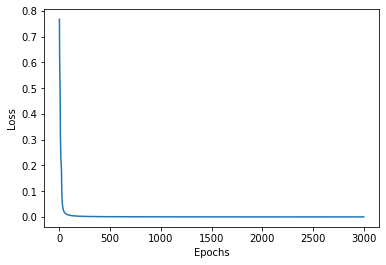

In [4]:
ReLU_MLP = MLP_with_RELU([25, 50, 5], seed=42)
print("===== \t MLPClassifier Before Training \t =====")
print(ReLU_MLP.forward(X_train))
ReLU_MLP.train(X_train, Y_train, epochs=3000, learning_rate=0.01)
print("===== \t MLPClassifier After Training \t =====")
print(ReLU_MLP.forward(X_train))
print("===== \t Groud Truth \t =====")
print(Y_train)
ReLU_MLP.plot_loss()

## 练习13：重复运行多次主函数，观察训练结果是否有差异？思考其中原因和改善方法


这里不理解老师所说的重复运行多次主函数什么意思，给定了网络和随机数种子，以及指定数据集，训练的结果就应该是固定的。

所以不明白差异体现在哪里。

这里是指Sigmoid函数 vs ReLU 函数的区别吗？

ReLU比Sigmoid的优点是它能解决梯度消失问题，以及计算效率高，ReLU在正区间上是线性的，因此训练速度较快

## 练习14：比较两种结构的优劣，结合本例比较两者的训练结果，并对结果进行分析。（提示：ReLU真的好吗？

In [7]:
print("===== \t MLP_ReLU Training \t =====")
print(np.round(ReLU_MLP.forward(X_train), 8))
print("===== \t MLP Training \t =====")
print(MLPClassifier.forward(X_train))
print("===== \t Groud Truth \t =====")
print(Y_train)

===== 	 MLP_ReLU Training 	 =====
[[9.9979435e-01 1.9230000e-05 1.4797000e-04 1.9230000e-05 1.9230000e-05]
 [1.0630000e-05 9.9964972e-01 3.1840000e-04 1.0630000e-05 1.0630000e-05]
 [4.8270000e-05 2.8801000e-04 9.9944132e-01 3.3250000e-05 1.8915000e-04]
 [3.1540000e-05 3.1540000e-05 3.1540000e-05 9.9987386e-01 3.1540000e-05]
 [3.1250000e-05 3.1250000e-05 1.3000000e-04 3.1250000e-05 9.9977625e-01]]
===== 	 MLP Training 	 =====
[[0.40460968 0.14884758 0.14884758 0.14884758 0.14884758]
 [0.14596971 0.3967701  0.16533306 0.14596356 0.14596356]
 [0.12435813 0.15426087 0.33804044 0.12435813 0.25898243]
 [0.14884758 0.14884758 0.14884758 0.40460968 0.14884758]
 [0.13878774 0.13878774 0.20637258 0.13878774 0.37726419]]
===== 	 Groud Truth 	 =====
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


在本例的结果来看，ReLU比Sigmoid更好地拟合了数据，并且在训练集和测试集上的表现都很好。

但是ReLU也有死亡问题，即在某些情况下，ReLU的梯度会变成0，导致网络无法学习到有效的特征。因此，在实际使用中，我们通常会使用LeakyReLU或ELU等激活函数。

## 15 补全Dropout相关代码，得到训练结果 
## 16 Dropout+ReLU如何实现?

这里我两个一起实现了

In [8]:
class MLP_with_ReLU_Dropout(object):
    def __init__(self, in_hidden_out:list, if_bias=False, seed=None, dropout_rate=0.5):
        self.input_size = in_hidden_out[0]
        self.output_size = in_hidden_out[-1]
        self.hidden_layers = len(in_hidden_out) - 2
        self.in_hidden_out = in_hidden_out
        self.if_bias = if_bias
        self.seed = seed
        self.weights = []
        self.biases = []
        self.loss = []
        self.activations = []
        self.num_classes = in_hidden_out[-1]
        self.dropout_rate = dropout_rate


        self.initialize_weights_and_biases()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    
    def corss_entropy(self, y_pred, y_true):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    

    def MSD(self, y_pred, y_true):
        return np.mean((y_pred - y_true)**2)
    

    def ReLU(self, x):
        return np.maximum(0, x)
    

    def Dropout(self, x, p=0.5):
        mask = np.random.rand(*x.shape) < p
        return x * mask / p

    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)


    def initialize_weights_and_biases(self):
        if self.seed:
            np.random.seed(self.seed)
        for i in range(self.hidden_layers + 1):
            self.weights.append(np.random.rand(self.in_hidden_out[i], self.in_hidden_out[i+1]) * 2 -1)
            if self.if_bias:
                self.biases.append(np.random.rand((1, self.in_hidden_out[i+1]))*2 -1)
            else:
                self.biases.append(np.zeros((1, self.in_hidden_out[i+1])))

    def forward(self, X):
        self.activations = [X]
        for i in range(self.hidden_layers + 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            # a = self.sigmoid(z)
            a = self.ReLU(z)
            a = self.Dropout(a, self.dropout_rate)  # dropout forward pass
            self.activations.append(a)
        # softmax output layer
        self.activations[-1] = self.softmax(self.activations[-1])
        return self.activations[-1]

    def backward(self, X, y, learning_rate):
        _ = self.forward(X)
        error = y - self.activations[-1]

        self.loss.append(self.corss_entropy(self.activations[-1], y))

        delta = error
        self.weights[-1] += learning_rate * np.dot(self.activations[-2].T, delta)
        if self.if_bias:
            self.biases[-1] += learning_rate * np.sum(delta, axis=0, keepdims=True)

        for i in range(self.hidden_layers, 0, -1):
            # delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(self.activations[i])
            delta = np.dot(delta, self.weights[i].T) * self.ReLU(self.activations[i]).astype(int)
            delta = self.Dropout(delta, self.dropout_rate) # dropout backward pass
            self.weights[i-1] += learning_rate * np.dot(self.activations[i-1].T, delta)
            if self.if_bias:
                self.biases[i-1] += learning_rate * np.sum(delta, axis=0, keepdims=True)

    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            self.backward(X, y, learning_rate)


    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

===== 	 MLPClassifier Before Training 	 =====
[[0.2   0.2   0.2   0.2   0.2  ]
 [0.2   0.2   0.2   0.2   0.2  ]
 [0.    0.    0.    0.912 0.088]
 [0.2   0.2   0.2   0.2   0.2  ]
 [0.004 0.004 0.984 0.004 0.004]]


C:\Users\Jeffey\AppData\Local\Temp/ipykernel_62760/3996595683.py:27: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
C:\Users\Jeffey\AppData\Local\Temp/ipykernel_62760/3996595683.py:27: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


===== 	 MLPClassifier After Training 	 =====
[[0.997 0.001 0.001 0.001 0.001]
 [0.545 0.114 0.114 0.114 0.114]
 [0.003 0.003 0.99  0.003 0.003]
 [0.2   0.2   0.2   0.2   0.2  ]
 [0.    0.    0.001 0.    0.997]]
===== 	 Groud Truth 	 =====
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


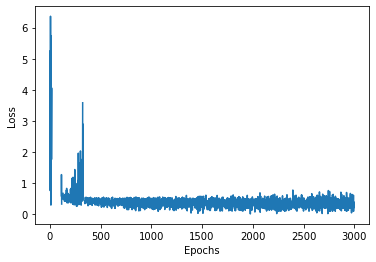

In [11]:
ReLU_Dropout_MLP = MLP_with_ReLU_Dropout([25, 50, 5], dropout_rate=0.5)
print("===== \t MLPClassifier Before Training \t =====")
print(np.round(ReLU_Dropout_MLP.forward(X_train),3))
ReLU_Dropout_MLP.train(X_train, Y_train, epochs=3000, learning_rate=0.01)
print("===== \t MLPClassifier After Training \t =====")
print(np.round(ReLU_Dropout_MLP.forward(X_train),3))
print("===== \t Groud Truth \t =====")
print(Y_train)
ReLU_Dropout_MLP.plot_loss()